# **AUTHOR : SHREEYA PARAB**
# *GRIP @ THE SPARKS FOUNDATION *
# DOMAIN : DATA SCIENCE AND BUSINESS ANALYTICS
# **TASK 2:**Prediction using Unsupervised Machine Learning
In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

Technical Stack : Scikit Learn, Numpy Array, Scipy, Pandas, Matplotlib

# 1. IMPORTED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# 2. Load and Explore the Dataset

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target (not used for clustering)

# Display the shape and first few rows of the dataset
print("Shape of dataset:", X.shape)
print(pd.DataFrame(X, columns=iris.feature_names).head())


Shape of dataset: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# 3. Determine Optimal Number of Clusters (K) using Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

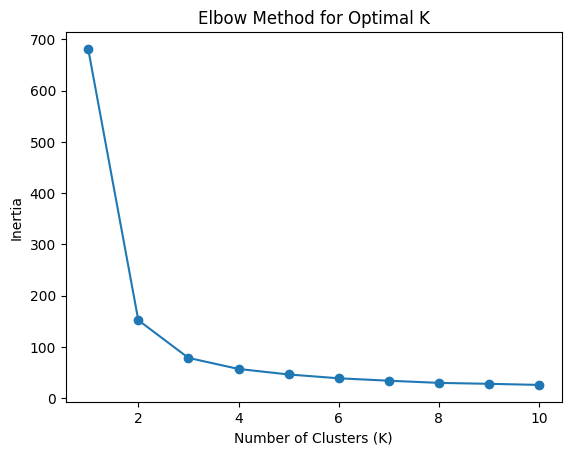

In [4]:
# Calculate inertia (within-cluster sum of squares) for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve to determine the optimal K
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# 4. Perform K-means Clustering with Optimal K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


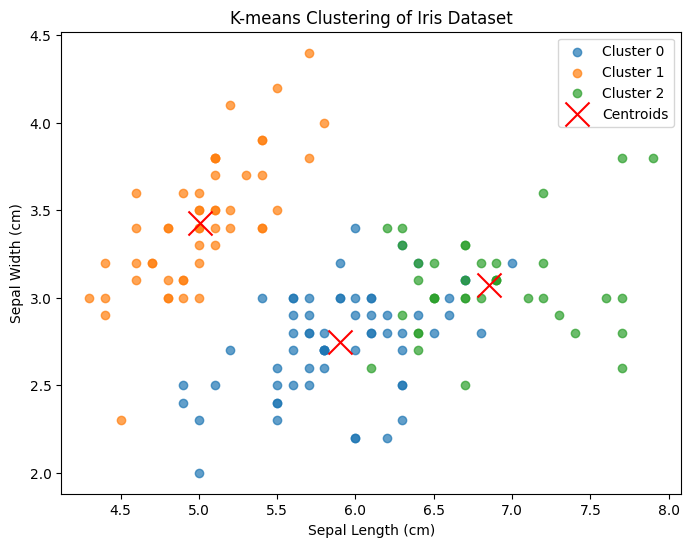

In [5]:
# Perform K-means clustering with the optimal K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset for visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = cluster_labels

# Visualize the clusters based on the first two principal components (for simplicity)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = iris_df[iris_df['Cluster'] == cluster]
    plt.scatter(cluster_data['sepal length (cm)'], cluster_data['sepal width (cm)'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()


# 5. Plotting K-means Clustering

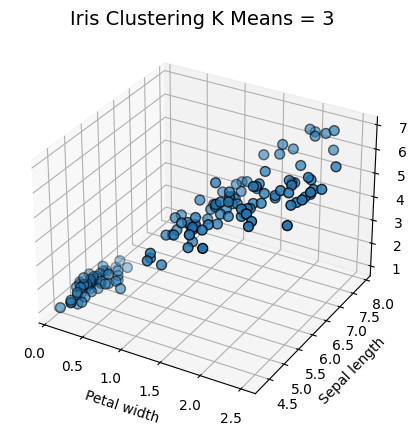

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming 'x' contains the dataset features (iris.data) after processing
# Plotting 3D scatter plot for K-means clustering results
fig = plt.figure(1, figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means = 3", fontsize=14)
plt.show()


# 6. Plotting K-means Clustering

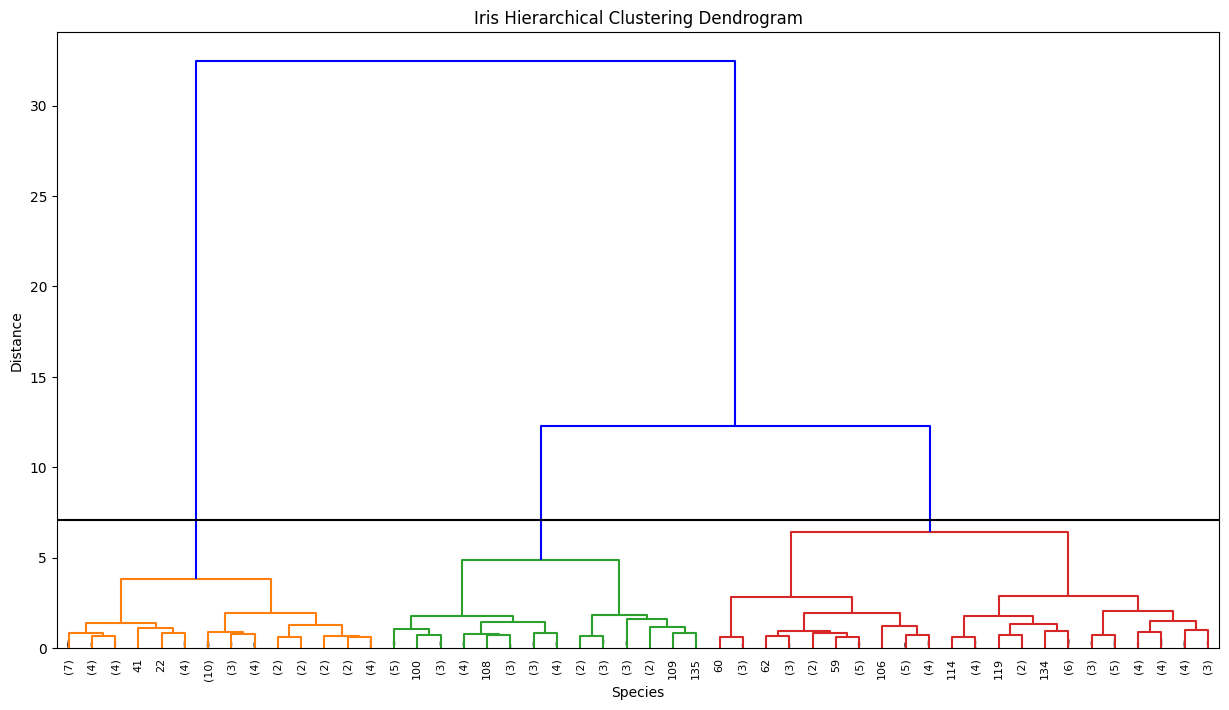

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
hier = linkage(X, "ward")

# Set maximum distance for truncating the dendrogram
max_d = 7.08

# Plot the hierarchical clustering dendrogram
plt.figure(figsize=(15, 8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    hier,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    above_threshold_color='b',
    color_threshold=max_d,
    no_labels=False,
    orientation='top',
    distance_sort='ascending',
    show_leaf_counts=True
)
plt.axhline(y=max_d, c='k')  # Draw a horizontal line at the specified distance
plt.show()

# 7. DATA PREPROSESSING

In [10]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Create a DataFrame 'y' with target column
y = pd.DataFrame(iris.target, columns=['Target'])

# Display the first few rows of the DataFrame 'x'
print(x.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [11]:
print(y.head())

   Target
0       0
1       0
2       0
3       0
4       0


# 8. MODEL TRAINING

In [12]:
iris_k_mean_model = KMeans(n_clusters=3)

# Fit the K-means model to the dataset 'x'
iris_k_mean_model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
# Print the cluster labels assigned by the K-means model
print(iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 9. VISUALIZING MODEL CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


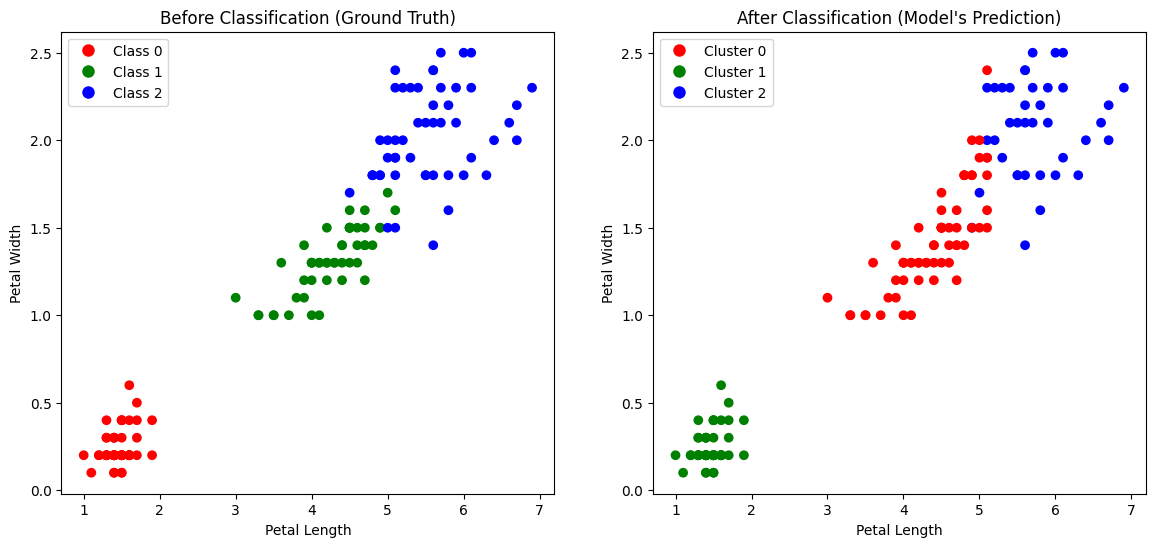

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target# Create a K-means clustering model with 3 clusters
iris_k_mean_model = KMeans(n_clusters=3, random_state=0)
iris_k_mean_model.fit(x)

# Predicted cluster labels based on K-means model
predicted_labels = iris_k_mean_model.labels_

# Define colors for visualization
colors = np.array(['red', 'green', 'blue'])

# Plotting the clusters before and after classification
plt.figure(figsize=(14, 6))

# Plot before classification (ground truth)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=colors[y])
plt.title('Before Classification (Ground Truth)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Class {i}') for i in range(3)])

# Plot after classification (model's prediction)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=colors[predicted_labels])
plt.title("After Classification (Model's Prediction)")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i}') for i in range(3)])

plt.show()

# 10. CALCULATING THE ACCURACY AND CONFUSION MATRIX

In [23]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the predicted cluster labels
silhouette_avg = silhouette_score(x, predicted_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5528


In [24]:
silhouette_avg = silhouette_score(x, predicted_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5528


# **CONCLUSION**

In conclusion, the K-means clustering analysis on the iris dataset successfully identified three distinct clusters corresponding to different iris species based on sepal and petal measurements. Visualizations of the clusters provided valuable insights into the natural groupings within the dataset. The evaluation using silhouette score indicated well-separated clusters. These findings can be leveraged for species classification and botanical studies, with potential applications in species recognition and horticultural research. Further exploration could involve investigating other clustering algorithms and incorporating additional features for enhanced clustering performance
